## Import libs and set up plots

In [104]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [105]:
# Set up the plot style and default size
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [106]:
# Read data from the csv
df = pd.read_csv('dataset\\movies.csv')

In [107]:
# Display the five first rows
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Display the percentage of null data

In [ ]:
for col in df.columns:
    percentage_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percentage_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


## Display data types for all the columns

In [ ]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## Clean the data

In [ ]:
# Change the type of columns to integer and replace NaN values with zero
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [ ]:
# Clean date objects to convert them to dates
country_name_pattern = r'\s*\(.*\)'
accepted_formats = ['%B %d, %Y', '%B %Y', '%Y']

cleaned_string_dates = df['released'].str.replace(country_name_pattern, '', regex=True)
cleaned_released_dates = pd.Series([None]*len(cleaned_string_dates))

# Verify if dates are in the expected format
for index, date_item in enumerate(cleaned_string_dates):
    converted_item = None
    for date_format in accepted_formats:
        try:
            converted_item = pd.to_datetime(date_item, format=date_format)
            break
        except:
            pass
        
    # The .iloc indexer in pandas is used for integer-location based indexing and selection by position
    cleaned_released_dates.iloc[index] = converted_item
    if converted_item is None:
        print(f'Date {date_item} could not be converted to formats: {accepted_formats}')
    
# Create correct year column
cleaned_released_dates = pd.to_datetime(cleaned_released_dates, errors='coerce')
df['yearcorrect'] = cleaned_released_dates.dt.year.astype('Int64').astype(str)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


## Sort the data and display plots

In [94]:
# Sort values of the column 'gross'
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
# Drop duplicates to show only the distinct ones
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
7657                                    NaN
Name: company, Length: 2386, dtype: object

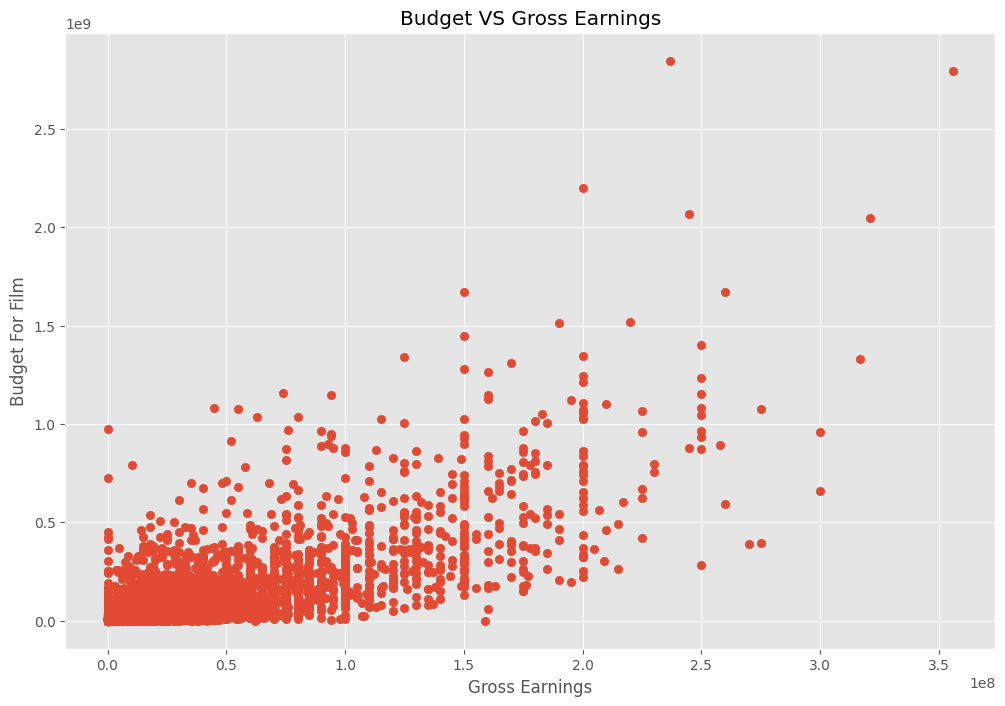

In [95]:
# Scatter plot with the budget and the gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget VS Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget For Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

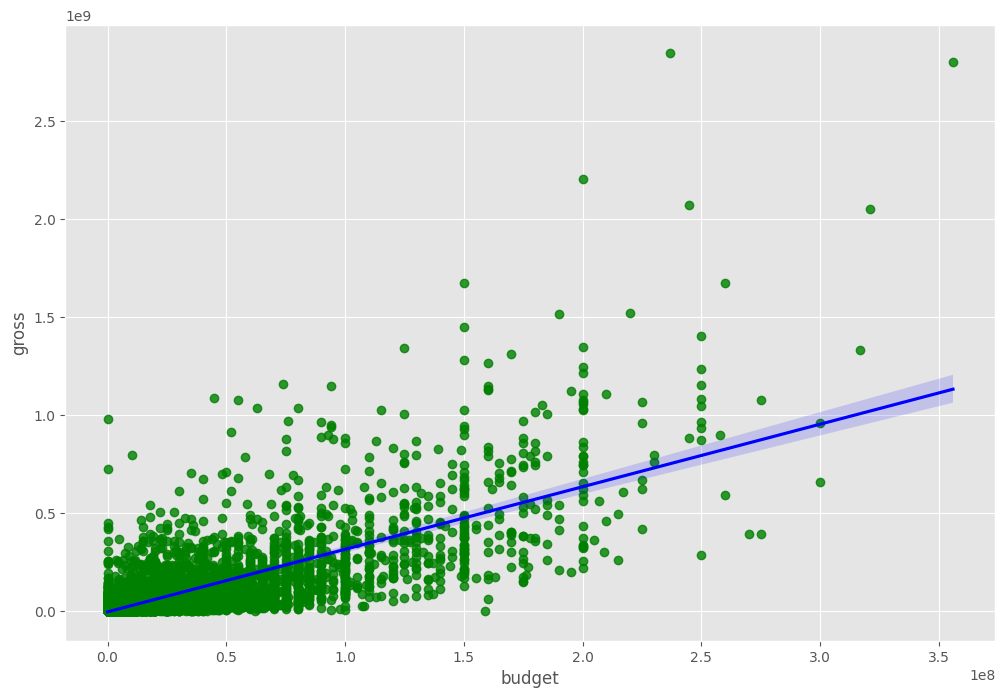

In [ ]:
# Regression plot of budget vs gross earnings using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'blue'})

In [97]:
# Looking at correlation
df_correlations = df.select_dtypes(include=['number'])
df_correlations.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


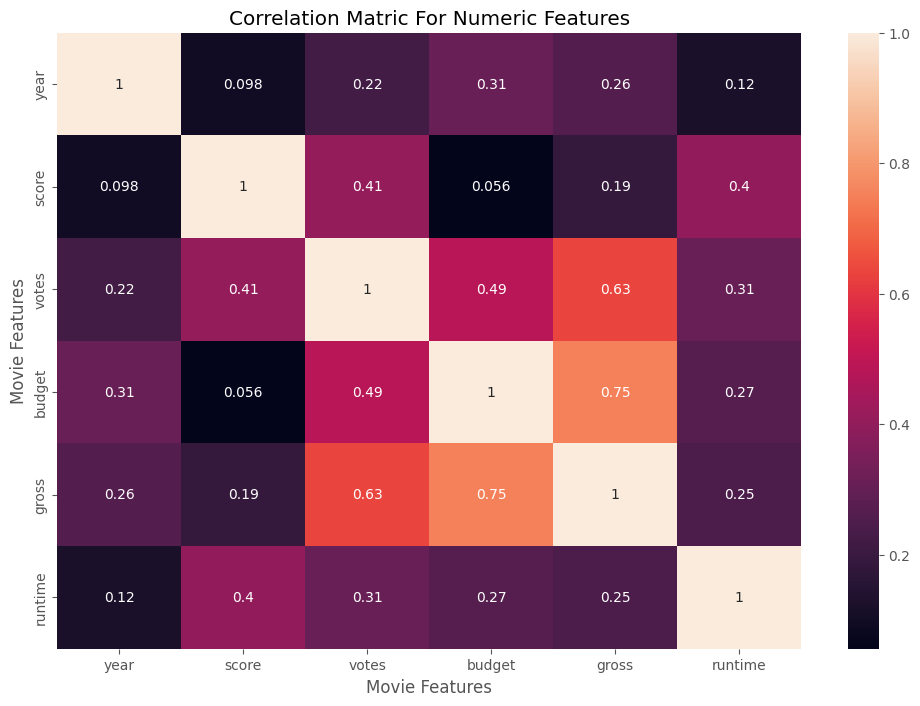

In [98]:
# Looking at a heatmap of the dataframe
correlation_matrix = df_correlations.corr()
sns.heatmap(correlation_matrix, annot=True)  
plt.title('Correlation Matric For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [99]:
# Catagorizing the columns that are not numerical
df_catagorized = df

for col_name in df_catagorized.columns:
    if (df_catagorized[col_name].dtype == 'object'):
        df_catagorized[col_name] = df_catagorized[col_name].astype('category')
        df_catagorized[col_name] = df_catagorized[col_name].cat.codes
        
df_catagorized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38


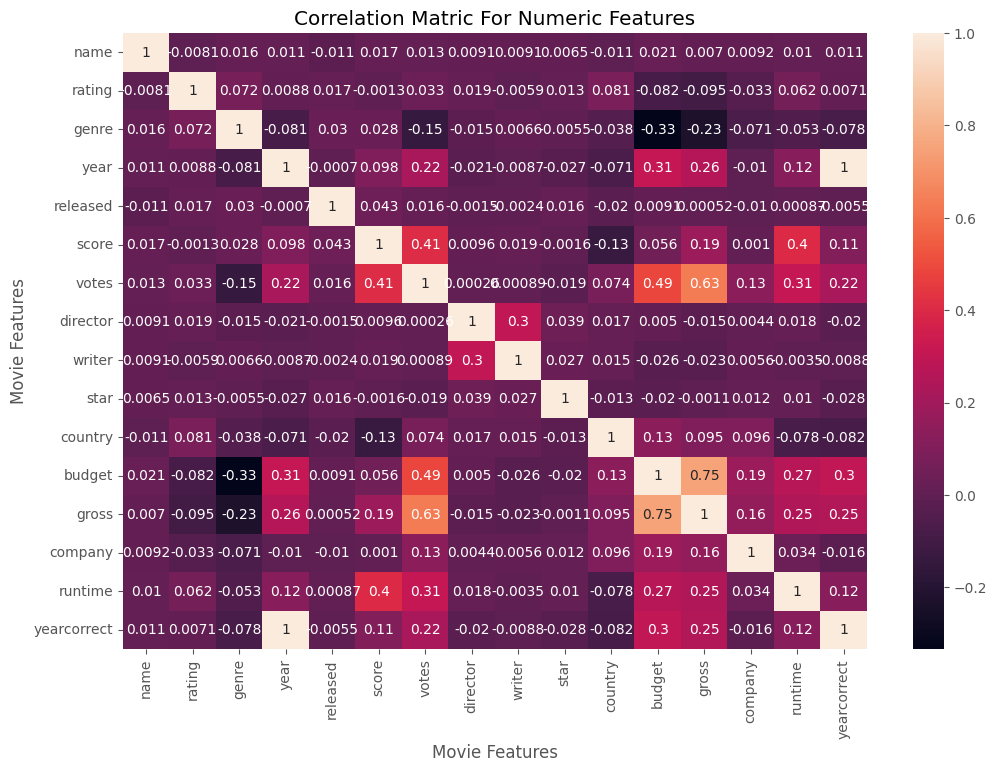

In [100]:
# Looking at a heapmap with the non-numerical data catagorized
sns.heatmap(df_catagorized.corr(), annot=True)  
plt.title('Correlation Matric For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [101]:
# Convert the correlation matrix from dataframe into a series of correlation pairs.
correlation_mat = df_catagorized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
                              ...   
yearcorrect  budget         0.299603
             gross          0.254686
             company       -0.016109
             runtime        0.120636
             yearcorrect    1.000000
Length: 256, dtype: float64

In [102]:
# Sort correlation pairs in ascending order based on their correlation values
sorted_values = corr_pairs.sort_values()
sorted_values

genre        budget        -0.334021
budget       genre         -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
             votes         -0.145307
                              ...   
star         star           1.000000
company      company        1.000000
gross        gross          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [103]:
# Obtaining only the highest correlations
high_correlation = sorted_values[sorted_values > 0.5]
high_correlation

gross        votes          0.632834
votes        gross          0.632834
gross        budget         0.750157
budget       gross          0.750157
year         yearcorrect    0.997295
yearcorrect  year           0.997295
director     director       1.000000
votes        votes          1.000000
released     released       1.000000
score        score          1.000000
rating       rating         1.000000
name         name           1.000000
genre        genre          1.000000
year         year           1.000000
budget       budget         1.000000
country      country        1.000000
writer       writer         1.000000
star         star           1.000000
company      company        1.000000
gross        gross          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64